In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
import random

In [2]:
class AgentState(TypedDict):
    min_number: int
    max_number: int
    
    guess: int
    counter: int

In [7]:
def set_min_max(state:AgentState) -> AgentState:
    state["min_number"] = random.randrange(1, 10)
    state["max_number"] = random.randrange(state["min_number"]+1, 20)
    
    state["counter"] = 0
    
    print(f"min number = {state['min_number']}, max number = {state['max_number']}")
    
    return state

def guess(state:AgentState) -> AgentState:
    state["guess"] = random.randrange(state["min_number"], state["max_number"])
    state["counter"] += 1
    print(f"Guessed {state['guess']} at loop {state['counter']}")
    return state
    
def should_loop(state:AgentState) -> AgentState:
    if state["counter"] < 7:
        print("ENTERING LOOP", state["counter"])
        return "loop"
    else:
        return "exit"

In [8]:
graph = StateGraph(AgentState)

graph.add_node("setup_node", set_min_max)
graph.add_node("guess_node", guess)

graph.add_edge("setup_node", "guess_node")

graph.add_conditional_edges(
    "guess_node",
    should_loop,
    {
        "loop":"guess_node",
        "exit": END
    }
)

graph.set_entry_point("setup_node")
app = graph.compile()

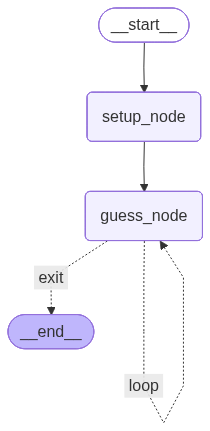

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
input = AgentState()

app.invoke(input)

min number = 9, max number = 18
Guessed 9 at loop 1
ENTERING LOOP 1
Guessed 15 at loop 2
ENTERING LOOP 2
Guessed 10 at loop 3
ENTERING LOOP 3
Guessed 11 at loop 4
ENTERING LOOP 4
Guessed 15 at loop 5
ENTERING LOOP 5
Guessed 13 at loop 6
ENTERING LOOP 6
Guessed 16 at loop 7


{'min_number': 9, 'max_number': 18, 'guess': 16, 'counter': 7}